<a href="https://colab.research.google.com/github/hyejeong14/BigdataAnalysisTest/blob/main/%EB%B9%85%EB%B6%84%EA%B8%B0_scikitlearn%EA%B8%B0%EC%B4%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#colab 내장 데이터셋 실습

##데이터 불러오기

In [ ]:
import pandas as pd

housing_df = pd.read_csv('/content/sample_data/california_housing_train.csv')

print('housing 변수 type : ',type(housing_df),'\n')
print(housing_df)

housing 변수 type :  <class 'pandas.core.frame.DataFrame'> 

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -114.31     34.19                15.0       5612.0          1283.0   
1        -114.47     34.40                19.0       7650.0          1901.0   
2        -114.56     33.69                17.0        720.0           174.0   
3        -114.57     33.64                14.0       1501.0           337.0   
4        -114.57     33.57                20.0       1454.0           326.0   
...          ...       ...                 ...          ...             ...   
16995    -124.26     40.58                52.0       2217.0           394.0   
16996    -124.27     40.69                36.0       2349.0           528.0   
16997    -124.30     41.84                17.0       2677.0           531.0   
16998    -124.30     41.80                19.0       2672.0           552.0   
16999    -124.35     40.54                52.0       1820.0           30

##데이터 확인

In [ ]:
print("DataFrame 크기 : ", housing_df.shape,'\n')
print(housing_df.head(5))

DataFrame 크기 :  (17000, 9) 

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0  


In [ ]:
print(housing_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB
None


In [ ]:
print(housing_df.loc[housing_df['housing_median_age']==30,['housing_median_age','total_bedrooms']].head(3))

     housing_median_age  total_bedrooms
26                 30.0           322.0
50                 30.0           136.0
101                30.0           177.0


In [ ]:
housing_groupby = housing_df.groupby('housing_median_age').mean()
print(housing_groupby.head(5))

                     longitude   latitude  total_rooms  total_bedrooms  \
housing_median_age                                                       
1.0                -121.465000  37.940000  2158.000000      335.500000   
2.0                -119.035306  35.410816  5237.102041      871.448980   
3.0                -118.798478  35.164783  6920.326087     1190.826087   
4.0                -118.805093  34.987764  6065.614907     1068.192547   
5.0                -118.789497  35.095327  4926.261307      910.924623   

                     population   households  median_income  \
housing_median_age                                            
1.0                  637.000000   190.000000       4.756800   
2.0                 2005.224490   707.122449       5.074237   
3.0                 2934.673913  1030.413043       5.572013   
4.0                 2739.956522   964.291925       5.196055   
5.0                 2456.979899   826.768844       4.732460   

                    median_house_value 

In [ ]:
housing_groupby = housing_df.groupby('housing_median_age')[['total_rooms','total_bedrooms']].mean()
print(housing_groupby.head(3))

                    total_rooms  total_bedrooms
housing_median_age                             
1.0                 2158.000000      335.500000
2.0                 5237.102041      871.448980
3.0                 6920.326087     1190.826087


In [ ]:
housing_groupby = housing_df.groupby('housing_median_age')[['total_rooms','total_bedrooms']].agg(['min','max','mean','sum'])
print(housing_groupby.head(5))

                   total_rooms                                 total_bedrooms  \
                           min      max         mean       sum            min   
housing_median_age                                                              
1.0                     2062.0   2254.0  2158.000000    4316.0          328.0   
2.0                       96.0  21897.0  5237.102041  256618.0           18.0   
3.0                      475.0  21060.0  6920.326087  318335.0          115.0   
4.0                        2.0  37937.0  6065.614907  976564.0            2.0   
5.0                      111.0  25187.0  4926.261307  980326.0           21.0   

                                                   
                       max         mean       sum  
housing_median_age                                 
1.0                  343.0   335.500000     671.0  
2.0                 3513.0   871.448980   42701.0  
3.0                 3559.0  1190.826087   54778.0  
4.0                 5471.0  1068.192547

In [ ]:
import numpy as np
housing_df['Age_na']=np.nan
print(housing_df.isna().head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0      False     False               False        False           False   
1      False     False               False        False           False   
2      False     False               False        False           False   
3      False     False               False        False           False   
4      False     False               False        False           False   

   population  households  median_income  median_house_value  Age_na  
0       False       False          False               False    True  
1       False       False          False               False    True  
2       False       False          False               False    True  
3       False       False          False               False    True  
4       False       False          False               False    True  


In [ ]:
print(housing_df.isna().sum())

longitude                 0
latitude                  0
housing_median_age        0
total_rooms               0
total_bedrooms            0
population                0
households                0
median_income             0
median_house_value        0
Age_na                17000
dtype: int64


In [ ]:
housing_df['Age_na']=housing_df['Age_na'].fillna(housing_df['housing_median_age'].mean())
print(housing_df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value     Age_na  
0      1015.0       472.0         1.4936             66900.0  28.589353  
1      1129.0       463.0         1.8200             80100.0  28.589353  
2       333.0       117.0         1.6509             85700.0  28.589353  
3       515.0       226.0         3.1917             73400.0  28.589353  
4       624.0       262.0         1.9250             65500.0  28.589353  


#scikit-learn

In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2


##데이터 불러오기

In [ ]:
#모델학습을 위한 fit 함수와 예측을 위한 predict 함수를 제공
#학습/테스트 데이터 분학, 데이터 전처리, 모델 구현, 하이퍼파라미터 조정, 모델 최종 결정, 성능 평가

from sklearn.datasets import load_iris

iris = load_iris()
print('붓꽃 데이터세트 타입 : ',type(iris))

keys = iris.keys()
print('붗꽃 데이터세트 키 : ',keys)

붓꽃 데이터세트 타입 :  <class 'sklearn.utils._bunch.Bunch'>
붗꽃 데이터세트 키 :  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


##데이터프레임으로 변환

In [ ]:
import pandas as pd

iris_df=pd.DataFrame(data=iris.data,columns=iris.feature_names)
iris_df['label']=iris.target #label이라는 column 추가 value는 iris의 target
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   label  
0      0  
1      0  
2      0  
3      0  
4      0  


##학습 데이터, 테스트 데이터 분리

In [ ]:
#학습용 데이터와 테스트 데이터 분리하기
from  sklearn.model_selection import train_test_split

iris_data = iris.data #데이터
iris_label = iris.target #예측하려는 값

x_train,x_test,y_train,y_test = train_test_split(iris_data,iris_label,test_size=0.2,random_state=11)

print('train dataset')
print('x_train dataset : ',len(x_train))
print('y_train dataset : ',len(y_train))
print('\n')
print('test dataset')
print('x_test dataset : ',len(x_test))
print('y_test dataset : ',len(y_test))


train dataset
x_train dataset :  120
y_train dataset :  120


test dataset
x_test dataset :  30
y_test dataset :  30


##의사결정 트리 이용하여 분류 예측

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_clf=DecisionTreeClassifier(random_state=11)  #의사결정트리클래스 DecisionTreeClassifier를 객체로 생성
dt_clf.fit(x_train,y_train) #모델학습을 위한 fit 함수 사용, 학습 데이터 x_train과 y_train 호출

DecisionTreeClassifier(random_state=11)

In [ ]:
from sklearn.metrics import accuracy_score

pred = dt_clf.predict(x_test) #예측을 위한 predict 함수 사용, x_test 값에 대한 예측
ac_score = accuracy_score(y_test,pred) #y_test값과 pred값에 대한 정확도 측정 (타겟 데이터셋, 예측 데이터셋)

print("예측 정확도 : ",ac_score)

예측 정확도 :  0.9333333333333333


##scikit-learn 데이터 전처리
- 결측치가 허용되지 않음 -> 삭제, 대체
- 문자열 허용되지 않음 -> 인코딩

###인코딩-레이블 인코딩
- 명목형 변수를 코드형 숫자 값으로 변환하는 것
- ex) 냉장고, tv, 전자레인지 <br>-> 냉장고 : 1, tv : 2, 전자레인지 : 3
<br>
<br>
***
<br>

- 숫자의 크기에 따라 가중치가 작용할 수 있어 선형회귀에는 사용이 적절치 않음<br>
- 트리 계열의 알고리즘의 경우 숫자에 따른 가중치 특성을 반영하지 않으므로 영향이 없음

In [ ]:
from sklearn.preprocessing import LabelEncoder

items = ['TV','냉장고','전자레인지','컴퓨터','TV','냉장고','컴퓨터','컴퓨터','청소기']

encoder = LabelEncoder()
encoder.fit(items) 
#fit()은 데이터 변환을 위한 기준 정보를 설정 (ex. data의 max/min 값 설정 등을 적용)
labels=encoder.transform(items)
# transform()은 설정된 정보를 이용해 데이터를 변환

print('인코딩 변환값 : ',labels)
print('인코딩 클래스 : ',encoder.classes_)

인코딩 변환값 :  [0 1 2 4 0 1 4 4 3]
인코딩 클래스 :  ['TV' '냉장고' '전자레인지' '청소기' '컴퓨터']


In [ ]:
from sklearn.preprocessing import LabelEncoder

items = ['ㅇ','ㅂ','ㅂ','ㅇ','ㅅ','ㅁ','ㅇ','ㅁ']

encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

print(labels)
print(encoder.classes_)

[3 1 1 3 2 0 3 0]
['ㅁ' 'ㅂ' 'ㅅ' 'ㅇ']


In [ ]:
#디코딩
origins = encoder.inverse_transform(labels)
print('디코딩 원본값 : ',origins)

디코딩 원본값 :  ['ㅇ' 'ㅂ' 'ㅂ' 'ㅇ' 'ㅅ' 'ㅁ' 'ㅇ' 'ㅁ']


###원-핫 인코딩
- 변수 값의 유형에 따라 새로운 변수를 추가해 고윳값에 해당하는 컬럼에만 1을 표시
- 상품분류 column에 냉장고 data -> 상품분류_냉장고에 1표시
<br>
<br>
***
<br>

- 모든 문자열 값이 숫자형 값으로 변환되어야 함<br>
- 입력 값으로 2차원 데이터가 필요함

In [ ]:
'''from sklearn.preprocessing import LabelEncoder

items = ['ㅇ','ㅂ','ㅂ','ㅇ','ㅅ','ㅁ','ㅇ','ㅁ']

encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)'''
print(labels)

[3 1 1 3 2 0 3 0]


In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

labels=labels.reshape(-1,1) #1열, 남은 배열의 길이와 남은 차원에 따라 행 유동적으로 조정

oh_encoder = OneHotEncoder() #객체 생성
oh_encoder.fit(labels)
oh_labels=oh_encoder.transform(labels)

print('원핫 인코딩 데이터')
print(oh_labels.toarray())
print("\n")
print('원핫 인코딩 데이터 차원')
print(oh_labels.shape)


원핫 인코딩 데이터
[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]


원핫 인코딩 데이터 차원
(8, 4)


####pandas get_dummies
scikit-learn의 OneHotEncorder와 다르게 명목형 데이터를 숫자형으로 변환할 필요 없이<br> 바로 2차원 데이터로 변환하여 인코딩을 수행할 수 있음

In [ ]:
print(items)
import pandas as pd

item_df = pd.DataFrame({'item':items})
print(item_df)

['ㅇ', 'ㅂ', 'ㅂ', 'ㅇ', 'ㅅ', 'ㅁ', 'ㅇ', 'ㅁ']
  item
0    ㅇ
1    ㅂ
2    ㅂ
3    ㅇ
4    ㅅ
5    ㅁ
6    ㅇ
7    ㅁ


In [ ]:
pd.get_dummies(item_df)

,item_ㅁ,item_ㅂ,item_ㅅ,item_ㅇ
0,0,0,0,1
1,0,1,0,0
2,0,1,0,0
3,0,0,0,1
4,0,0,1,0
5,1,0,0,0
6,0,0,0,1
7,1,0,0,0


###스케일링
- 표준화<br>
  - 원 데이터를 평균이 0이고 분산이 1인 정규 분포를 가진 값으로 변환<br>
  - 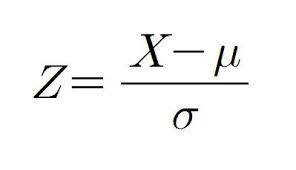<br>
  <br>
- 정규화
  - 서로 다른 변수의 크기를 통일하기 위해 크기를 변환<br>
  - 예시) 최대-최소 정규화<br>
  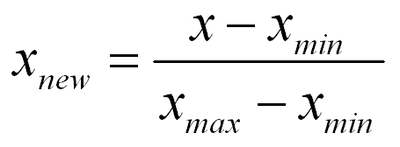

In [ ]:
#평균과 분산 확인하기
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data,columns=iris.feature_names)

print('feature 들의 평균 값 :')
print(iris_df.mean(),'\n')
print('feature 들의 분산 값 :')
print(iris_df.var())

feature 들의 평균 값 :
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64 

feature 들의 분산 값 :
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


####StandardScaler 표준화
- 평균 0, 분산 1

In [ ]:
from sklearn.preprocessing import StandardScaler #표준화를 위한 라이브러리 호출

scaler = StandardScaler() #객체 생성
scaler.fit(iris_df) 
iris_scaled = scaler.transform(iris_df)
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)


print('feature 들의 평균 값 :')
print(iris_df_scaled.mean(),'\n') #0에 가까운 값 출력
print('feature 들의 분산 값 :')
print(iris_df_scaled.var()) #1에 가까운 값 출력

feature 들의 평균 값 :
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64 

feature 들의 분산 값 :
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


####MinMaxScaler 정규화
- 0과 1사이의 범위 값으로 변환

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)


print('feature 들의 최소 값 :')
print(iris_df_scaled.min(),'\n') 
print('feature 들의 최대 값 :')
print(iris_df_scaled.max()) 

feature 들의 최소 값 :
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64 

feature 들의 최대 값 :
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


###fit-transform 주의사항
- 학습 데이터 셋에 fit을 적용하면 테스트 데이터에는 fit을 적용하면 안됨
- 머신러닝 모델은 **학습 데이터를 기반으로 학습**되기 때문에 반드시 테스트 데이터는 학습 데이터의 스케일링 기준을 따라야 하기 때문

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

train_array = np.arange(0,11).reshape(-1,1)
test_array = np.arange(0,6).reshape(-1,1)

scaler = MinMaxScaler()
scaler.fit(train_array) #train_array에 fit 적용 => 스케일링 기준 정보가 됨

train_scaled = scaler.transform(train_array)
test_scaled = scaler.transform(test_array)

print('원본 train_array 데이터 :')
#print(train_array.reshape(-1))
print(np.round(train_array.reshape(-1),2),'\n') #reshape(-1) => 1차원 배열 반환
print('Scaled train_array 데이터 :')
print(np.round(train_scaled.reshape(-1),2),'\n') 

print('\n')
print('원본 test_array 데이터 :')
#print(train_array.reshape(-1))
print(np.round(test_array.reshape(-1),1),'\n') #reshape(-1) => 1차원 배열 반환
print('Scaled test_array 데이터 :')
print(np.round(test_scaled.reshape(-1),1),'\n') 

원본 train_array 데이터 :
[ 0  1  2  3  4  5  6  7  8  9 10] 

Scaled train_array 데이터 :
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ] 



원본 test_array 데이터 :
[0 1 2 3 4 5] 

Scaled test_array 데이터 :
[0.  0.1 0.2 0.3 0.4 0.5] 

